# Minst 手寫辨識


## 下載資料集

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
# 讀取Minst資料集
(train_feature, train_label), \
(test_feature, test_label) = mnist.load_data()

In [3]:
# 查看訓練資料內容
print(len(train_feature),len(train_label)) # 資料筆數
print(train_feature.shape,train_label.shape) # feature 是28*28的圖片, label是0~9的數字

60000 60000
(60000, 28, 28) (60000,)


## 查看訓練資料

In [4]:
# 顯示訓練資料的圖片和值
import matplotlib.pyplot as plt
def show_image(image,size=2):
    fig = plt.gcf()
    fig.set_size_inches(size,size)  # 預設顯示大小 2
    plt.imshow(image, cmap='binary') # 黑白灰階顯示
    plt.show()

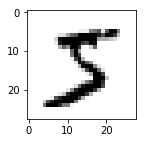

5


In [5]:
show_image(train_feature[0])
print(train_label[0])

In [6]:
# 顯示多個資料
def show_images_labels_predictions(images,labels,
                                 predictions,start_id,num=10):
    plt.gcf().set_size_inches(12,14)
    if num>25 :
        num = 25
    for i in range(num):
        # 以subplot方式印出不同資料圖片
        ax = plt.subplot(5,5,i+1)
        ax.imshow(images[start_id], cmap='binary')

        # 有預測結果的資料，在標題顯示結果
        if len(predictions) > 0 :
            title = 'AI = ' + str(predictions[i])
            # 顯示正確或錯誤
            title += '(o)' if predictions[i]==labels[i] else '(x)' 
            title += '\n'+'label = ' + str(labels[i])
        # 沒有預測結果的資料，只在標題顯示真實數值
        else:
            title = 'label = ' + str(labels[i])
        
        # XY軸刻度不顯示
        ax.set_xticks([]);ax.set_yticks([])
        ax.set_title(title,fontsize=12)
        start_id += 1
    plt.show

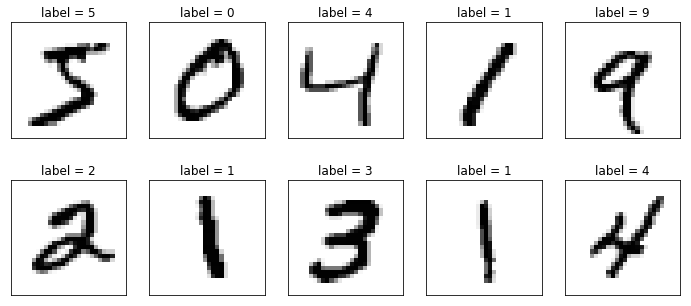

In [7]:
show_images_labels_predictions(train_feature,train_label,[],0,10)

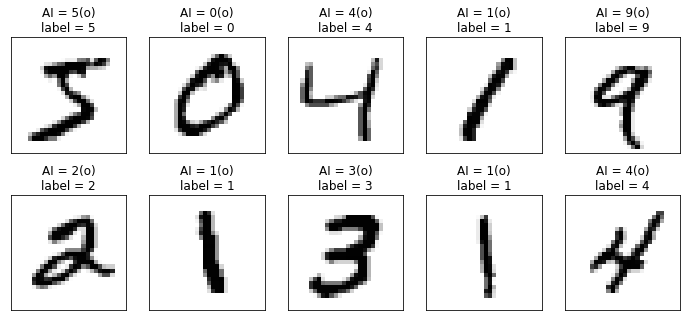

In [8]:
# 先偷拿正確答案來測試預測顯示
show_images_labels_predictions(train_feature,train_label,train_label,0,10)

## Preprocessing(Feaeture)
每個Minst的數字圖片都是由**28*28**個的0~255的int組成
在這邊需要轉換成784個一維的0~1的float數。

### 轉換維度和格式

In [9]:
# 用reshape()將資料轉成一維float格式
train_feature_vector = train_feature.reshape(len(train_feature),784)
train_feature_vector = train_feature_vector.astype('float32')
test_feature_vector = test_feature.reshape(len(test_feature),784)
test_feature_vector = test_feature_vector.astype('float32')
# 對比原來和後來的資料
print(train_feature.shape,train_feature_vector.shape)
print(test_feature.shape,test_feature_vector.shape)

(60000, 28, 28) (60000, 784)
(10000, 28, 28) (10000, 784)


### 標准化

In [10]:
print(train_feature_vector[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

In [11]:
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255
print(train_feature_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

## Preprocess(Label)
原本的Label是0~9的數字，為了增加模型的訓練效率，需要轉換成one-hot編碼

In [12]:
print(train_label[0:5])

[5 0 4 1 9]


In [13]:
from keras.utils import np_utils
train_label_onehot = np_utils.to_categorical(train_label)
test_label_onehot = np_utils.to_categorical(test_label)
print(train_label_onehot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## 建立MLP模型
    1. 輸入層: 784
    2. 隱藏層: 256
    3. 輸出層: 10

In [14]:
import keras.models
from keras.models import Sequential
from keras.layers.core import Dense,Activation
from keras.optimizers import Adam
from sklearn import preprocessing

In [15]:
# 建立Sequential模型
def build_model():
    model = Sequential()
    model.add(Dense(input_dim=784,units=256))
    model.add(Activation('relu'))
    model.add(Dense(units=10))
    model.add(Activation('softmax'))
    model.summary()
    return model

# 建立輸入層和隱藏層
from keras.layers import Dense
model.add(Dense(units=256,
               input_dim=784,
               kernel_initializer='normal',
               activation='relu'))

# 建立輸出層
model.add(Dense(units=10,
               kernel_initializer='normal',
               activation='softmax'))

In [16]:
model = build_model()

W0926 13:39:11.446808  7756 deprecation_wrapper.py:119] From A:\Anaconda3\envs\tensorflowenv\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0926 13:39:11.821806  7756 deprecation_wrapper.py:119] From A:\Anaconda3\envs\tensorflowenv\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0926 13:39:11.995590  7756 deprecation_wrapper.py:119] From A:\Anaconda3\envs\tensorflowenv\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## 訓練模型

### 設定模型訓練方式
以compile方法定義損失函數Loss、最佳化方法Optimizer、評估準確率方法metrics


In [17]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0926 13:39:12.143200  7756 deprecation_wrapper.py:119] From A:\Anaconda3\envs\tensorflowenv\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0926 13:39:12.179323  7756 deprecation_wrapper.py:119] From A:\Anaconda3\envs\tensorflowenv\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



### 訓練繪圖工具

In [18]:
# 訓練繪圖工具
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

### 進行訓練

In [19]:
train_history = model.fit(x=train_feature_normalize,
                          y=train_label_onehot,validation_split=0.2,
                          epochs=10,batch_size=200,verbose=2)

W0926 13:39:12.535372  7756 deprecation.py:323] From A:\Anaconda3\envs\tensorflowenv\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0926 13:39:12.600197  7756 deprecation_wrapper.py:119] From A:\Anaconda3\envs\tensorflowenv\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.3845 - acc: 0.8949 - val_loss: 0.2040 - val_acc: 0.9457
Epoch 2/10
 - 2s - loss: 0.1707 - acc: 0.9514 - val_loss: 0.1502 - val_acc: 0.9567
Epoch 3/10
 - 2s - loss: 0.1193 - acc: 0.9668 - val_loss: 0.1277 - val_acc: 0.9637
Epoch 4/10
 - 1s - loss: 0.0926 - acc: 0.9744 - val_loss: 0.1067 - val_acc: 0.9690
Epoch 5/10
 - 1s - loss: 0.0733 - acc: 0.9799 - val_loss: 0.0979 - val_acc: 0.9705
Epoch 6/10
 - 1s - loss: 0.0583 - acc: 0.9837 - val_loss: 0.0936 - val_acc: 0.9723
Epoch 7/10
 - 1s - loss: 0.0486 - acc: 0.9865 - val_loss: 0.0851 - val_acc: 0.9741
Epoch 8/10
 - 1s - loss: 0.0397 - acc: 0.9897 - val_loss: 0.0816 - val_acc: 0.9758
Epoch 9/10
 - 1s - loss: 0.0320 - acc: 0.9922 - val_loss: 0.0815 - val_acc: 0.9758
Epoch 10/10
 - 1s - loss: 0.0262 - acc: 0.9940 - val_loss: 0.0814 - val_acc: 0.9749


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


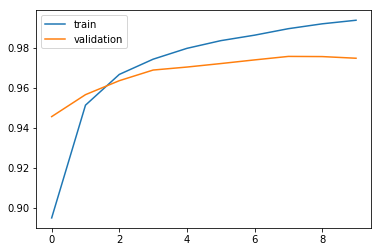

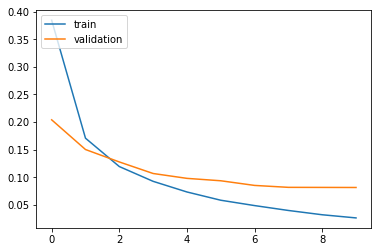

In [20]:
model.summary()
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [28]:
scores = model.evaluate(test_feature_normalize,test_label_onehot)
print('\n 準確率：',scores[1])

10000/10000 [==============================] - 0s 26us/step

 準確率： 0.9776


In [32]:
model.save("Minst_model_1.h5")

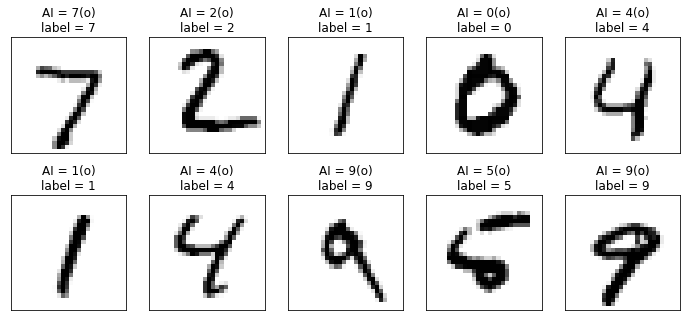

In [21]:
prediction=model.predict_classes(test_feature_normalize)
show_images_labels_predictions(test_feature,test_label,prediction,0)

In [22]:
# 建立Sequential模型
def build_model_2():
    model = Sequential()
    model.add(Dense(input_dim=784,units=256))
    model.add(Activation('relu'))
    model.add(Dense(units=64))
    model.add(Activation('relu'))
    model.add(Dense(units=10))
    model.add(Activation('softmax'))
    model.summary()
    return model

In [23]:
model_2 = build_model_2()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [24]:
model_2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [25]:
train_history = model_2.fit(x=train_feature_normalize,
                          y=train_label_onehot,validation_split=0.2,
                          epochs=10,batch_size=200,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.3780 - acc: 0.8923 - val_loss: 0.1771 - val_acc: 0.9499
Epoch 2/10
 - 2s - loss: 0.1472 - acc: 0.9567 - val_loss: 0.1239 - val_acc: 0.9635
Epoch 3/10
 - 1s - loss: 0.0994 - acc: 0.9706 - val_loss: 0.1040 - val_acc: 0.9697
Epoch 4/10
 - 1s - loss: 0.0727 - acc: 0.9782 - val_loss: 0.0909 - val_acc: 0.9738
Epoch 5/10
 - 2s - loss: 0.0554 - acc: 0.9837 - val_loss: 0.0911 - val_acc: 0.9738
Epoch 6/10
 - 1s - loss: 0.0434 - acc: 0.9869 - val_loss: 0.0826 - val_acc: 0.9757
Epoch 7/10
 - 1s - loss: 0.0332 - acc: 0.9906 - val_loss: 0.0866 - val_acc: 0.9741
Epoch 8/10
 - 1s - loss: 0.0251 - acc: 0.9926 - val_loss: 0.0831 - val_acc: 0.9758
Epoch 9/10
 - 1s - loss: 0.0210 - acc: 0.9942 - val_loss: 0.0819 - val_acc: 0.9763
Epoch 10/10
 - 1s - loss: 0.0167 - acc: 0.9953 - val_loss: 0.0860 - val_acc: 0.9774


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_4 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


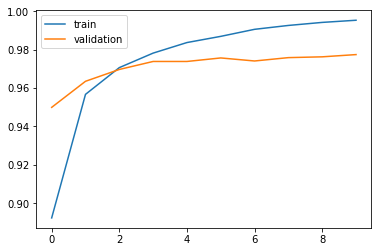

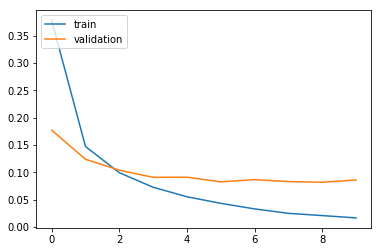

In [29]:
model_2.summary()
show_train_history(train_history,'acc','val_acc')
show_train_history(train_history,'loss','val_loss')

In [31]:
scores = model_2.evaluate(test_feature_normalize,test_label_onehot)
print('\n 準確率：',scores[1])

10000/10000 [==============================] - 0s 25us/step

 準確率： 0.9766
